# GRADIENT BOOSTING REGRESSOR
Columnas usadas: carat, cut_num, color_num, clarity_num, x,y,z, depth, table
Sin escalar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('data/diamonds_train.csv')
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [3]:
diamonds_predict = pd.read_csv('data/diamonds_test.csv')

## GETTING RID OF 0 IN xyz

### TRAIN

In [4]:
diamonds_train = diamonds_train[(diamonds_train['x'] != 0) & (diamonds_train['y'] != 0) & (diamonds_train['z'] != 0)]
diamonds_train.shape

(40439, 10)

### TEST

Celda no ejecutada porque al eliminar rows en el csv de test, da fallo la submission

diamonds_predict = diamonds_predict[(diamonds_predict['x'] != 0) & (diamonds_predict['y'] != 0) & (diamonds_predict['z'] != 0)]
diamonds_predict.info()

## GET RID OF OUTLIERS

Tried with 75-25, not a good idea shape=(6465, 10), we gonna try with some less outliers

In [5]:
 len(diamonds_train[diamonds_train["table"]>70])

6

In [6]:
# Hay un diamante con un depth de 79
diamonds_train = diamonds_train[(diamonds_train["depth"]<71) & (diamonds_train["depth"]>54)]

# Hay 3 mayores de 75 y dos menores de 45
diamonds_train = diamonds_train[(diamonds_train["table"]<70) & (diamonds_train["table"]>52)]

diamonds_train = diamonds_train[(diamonds_train["x"]<10)] 
#solo dropeamos las que sean x<10 porque coincide con 'y' en sus dos únicos valores por encima de 10 y no dropeamos nada de z porque hay bastantes valores en torno a 6

In [7]:
diamonds_train.shape

(40345, 10)

# ENCODING CATEGORIES

## TRAIN

In [8]:
cut_num = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
diamonds_train['cut_num'] = diamonds_train['cut'].replace(cut_num)

In [9]:
color_num = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
diamonds_train['color_num'] = diamonds_train['color'].replace(color_num)

In [10]:
clarity_num = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7, 'I1': 8}
diamonds_train['clarity_num'] = diamonds_train['clarity'].replace(clarity_num)

## TEST CSV (nuestro diamonds_predict)

In [11]:
cut_num = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
diamonds_predict['cut_num'] = diamonds_predict['cut'].replace(cut_num)
color_num = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
diamonds_predict['color_num'] = diamonds_predict['color'].replace(color_num)
clarity_num = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7, 'I1': 8}
diamonds_predict['clarity_num'] = diamonds_predict['clarity'].replace(clarity_num)

# FEATURE ENGINERING

## Price/Carat
Útil para el análisis, para ML No tiene sentido, pues usa la columna Target

In [12]:
diamonds_train['price/carat']=diamonds_train['price']/diamonds_train['carat']

In [41]:
diamonds_train.groupby('clarity')['price/carat'].mean()

clarity
I1      2787.088564
IF      4218.128376
SI1     3843.346228
SI2     4024.958630
VS1     4130.901159
VS2     4074.601117
VVS1    3884.151077
VVS2    4177.365600
Name: price/carat, dtype: float64

## Carat Ranges

In [61]:
carat_groups = []
for i in diamonds_train['carat']:
    if i< 1:
        carat_groups.append('light')
    elif i >= 1:
        carat_groups.append('medium')
    elif i>=2:
        carat_groups.append('heavy')
diamonds_train['carat_groups'] = carat_groups
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40454
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         40345 non-null  float64
 1   cut           40345 non-null  object 
 2   color         40345 non-null  object 
 3   clarity       40345 non-null  object 
 4   depth         40345 non-null  float64
 5   table         40345 non-null  float64
 6   price         40345 non-null  int64  
 7   x             40345 non-null  float64
 8   y             40345 non-null  float64
 9   z             40345 non-null  float64
 10  cut_num       40345 non-null  int64  
 11  color_num     40345 non-null  int64  
 12  clarity_num   40345 non-null  int64  
 13  price/carat   40345 non-null  float64
 14  carat_groups  40345 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 6.2+ MB


### Test

In [59]:
carat_groups = []
for i in diamonds_predict['carat']:
    if i< 1:
        carat_groups.append('light')
    elif i >= 1:
        carat_groups.append('medium')
    elif i>=2:
        carat_groups.append('heavy')
diamonds_predict['carat_groups'] = carat_groups

In [78]:
carat_num = {'heavy': 1, 'medium': 2, 'light': 3}
diamonds_train['carat_num'] = diamonds_train['carat_groups'].replace(carat_num)
diamonds_predict['carat_num'] = diamonds_predict['carat_groups'].replace(carat_num)

In [79]:
diamonds_train['carat_num']

0        2
1        3
2        3
3        3
4        2
        ..
40450    2
40451    2
40452    2
40453    3
40454    2
Name: carat_num, Length: 40345, dtype: int64

## HEATMAP

Depth & cut no están muy relacionados con el precio

<AxesSubplot:>

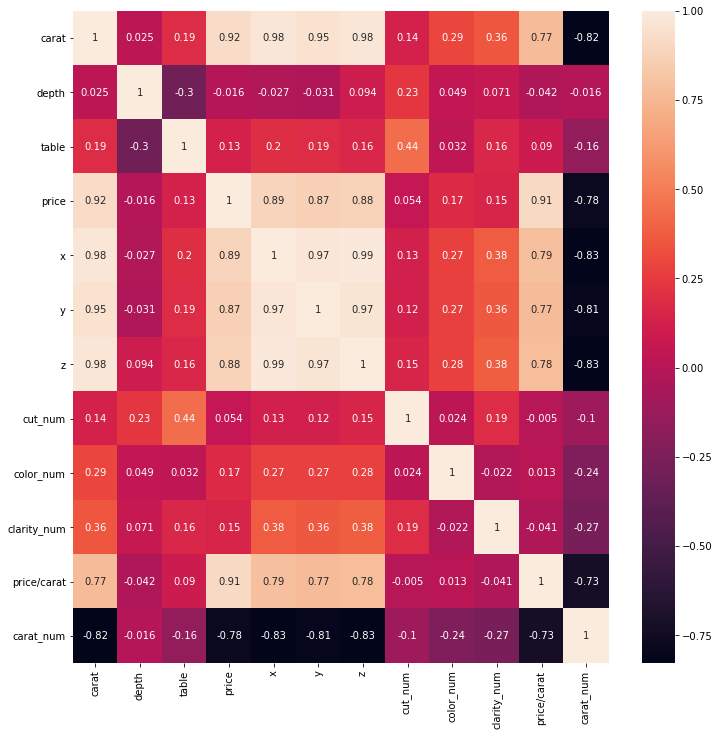

In [80]:
plt.figure(figsize=(12,12))
corr = diamonds_train.corr()
sns.heatmap(data=corr, annot=True, cbar=True)

# ESCALAR

In [81]:
#cat_features = ['cut', 'color', 'clarity']
features = ['carat', 'table', 'depth', 'x', 'y', 'z', 'cut_num', 'color_num', 'clarity_num', 'carat_num']
#predict_feat = ['id','carat', 'table', 'depth', 'x', 'y', 'z', 'cut_num', 'color_num', 'clarity_num']
target = 'price'

### TRAIN

In [16]:
#from sklearn.preprocessing import StandardScaler

In [18]:
#scaler = StandardScaler()

In [19]:
#X = scaler.fit_transform(diamonds_train[features])
#y = diamonds_train[target]

### TEST CSV (PREDICT)

In [20]:
#X_pred = scaler.fit_transform(diamonds_predict[features])

# TRAIN-TEST-SPLIT

In [82]:
from sklearn.model_selection import train_test_split 

In [83]:
X = diamonds_train[features]
y = diamonds_train[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

### TEST

# MODELS

In [85]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

## 1. RANDOM FOREST

In [86]:
rfr_model = RandomForestRegressor()

In [87]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = rfr_model.predict(X_test)

In [89]:
cv_score = cross_val_score(estimator=rfr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % rfr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = rfr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.4s finished


Cross validation score : 0.9814
[0.98189592 0.98040328 0.98109029 0.97864178 0.98061774]
mae: 271.085432
R2: 1.000000
mse: 297098.505676
rmse: 545.067432


In [ ]:
## Resultado con menor borrado de outliers
""" Cross validation score : 0.9802
[0.98126694 0.97996946 0.98019617 0.97966395 0.98139158]
mae: 276.100062
R2: 1.000000
mse: 319233.146818
rmse: 565.007210
"""

In [ ]:
#crossval_score = cross_val_score(rfr_model, X_train, y_train, cv=10)
#print(cross_val_score)

## 2. DECISION TREE

In [24]:
dtr_model = DecisionTreeRegressor(random_state = 0) #rstate=0 porque los resultados son mejores que sin poner nada o poniendo 1
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)

In [25]:
cv_score = cross_val_score(estimator=dtr_model, X=X_train, y=y_train, cv=10,verbose = 1)
print('Cross validation score : %.4f' % dtr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = dtr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross validation score : 0.9991
[0.99872145 0.99932889 0.99921568 0.99928827 0.99885487 0.99867995
 0.99925284 0.99811001 0.99920388 0.99944123]
mae: 36.373649
R2: 1.000000
mse: 13889.816100
rmse: 117.855064


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


In [ ]:
"""
Cross validation score : 0.96
[0.96471869 0.96286045 0.96237324 0.96244763 0.96538262]
mae: 369.804442
R2: 1.000000
mse: 570145.458766
rmse: 755.079770
"""

mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = rfr_model.score(X_test,y_test)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

RESULTADOS SIN CAMBIAR RANDOM STATE:, con random state = 0, mejora
mae: 372.840853
R2: 0.980116
mse: 579384.121723
rmse: 761.172859

## 3. GRADIENT BOOSTING

In [90]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls',verbose = 1)
#max_depth 1, mal, 2, mal, 4 ok (553 rmse), 8 ok (542)

In [91]:
gbr_model.fit(X_train , y_train)
y_pred = gbr_model.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1    12936727.5590           10.45s
         2    10556043.6099            9.40s
         3     8624076.6971            9.05s
         4     7056892.5820            8.42s
         5     5783187.6160            8.00s
         6     4749749.8246            7.72s
         7     3907469.2639            7.59s
         8     3225038.8779            7.37s
         9     2668253.5362            7.22s
        10     2214853.1737            7.15s
        20      476349.6441            6.14s
        30      228434.9463            5.32s
        40      171599.4664            4.55s
        50      148657.9043            3.88s
        60      134342.5004            3.24s
        70      122895.3753            2.50s
        80      113224.3953            1.68s
        90      105505.2592            0.84s
       100       99189.5698            0.00s


In [92]:
cv_score = cross_val_score(estimator=gbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % rfr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = gbr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    12874689.3122            8.07s
         2    10506736.2321            8.76s
         3     8584152.2056            8.40s
         4     7023146.9189            7.83s
         5     5753361.8718            7.27s
         6     4724132.6101            6.89s
         7     3887608.1564            6.74s
         8     3207435.7191            6.49s
         9     2652586.8197            6.27s
        10     2203291.5442            6.09s
        20      465613.9292            5.04s
        30      216646.8615            4.30s
        40      162405.2721            3.66s
        50      137927.7255            3.06s
        60      124202.9341            2.44s
        70      112680.5615            1.83s
        80      102444.7207            1.22s
        90       95297.8569            0.61s
       100       90035.7783            0.00s
      Iter       Train Loss   Remaining Time 
         1    12959314.5669            5.51s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.0s finished


Cross validation score : 0.9814
[0.98258028 0.98134553 0.98237519 0.97870115 0.98103695]
mae: 267.997498
R2: 1.000000
mse: 286748.612795
rmse: 535.489134


In [ ]:
"""
Cross validation score : 0.9815
[0.98252068 0.98130918 0.98244676 0.97857692 0.98098148]
mae: 268.266150
R2: 1.000000
mse: 287796.842194
rmse: 536.467000
"""

## LIGHT GBM

In [93]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [94]:
hgbr_model = HistGradientBoostingRegressor()

In [95]:
hgbr_model.fit(X_train, y_train)
y_pred = hgbr_model.predict(X_test)

In [96]:
cv_score = cross_val_score(estimator=hgbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % hgbr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = hgbr_model.score(X_test,y_pred)
print("R2: %.4f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross validation score : 0.9821
[0.98256212 0.981837   0.9828018  0.97995788 0.98185289]
mae: 282.707020
R2: 1.0000
mse: 286094.316393
rmse: 534.877852


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


In [ ]:
""" Cross validation score : 0.9822
[0.98270454 0.98172722 0.98241903 0.97935203 0.9816655 ]
mae: 280.066804
R2: 1.0000
mse: 284251.192566
rmse: 533.152129
"""

# ERROR METRICS

### MAE

In [ ]:
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))

### RMSE

In [ ]:
rmse = (mean_squared_error(Y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

### R2

In [ ]:
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))

## PREDICTION

In [97]:
X_predict = diamonds_predict[features] # X_predict = X_pred if scaled
predictions = gbr_model.predict(X_predict)
diamonds_id = diamonds_predict['id']

# GENERAR DF

In [98]:
submission = pd.DataFrame({'id': diamonds_id, 'price': predictions})

In [99]:
submission.shape

(13485, 2)

In [100]:
submission.to_csv('submission.csv', index=False)